# Training a Handwritten Digit recognition network

Will be using MNIST dataset and keras to design the network

In [2]:
## import statements

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# prints the version of tensorflow that we are currently using
print(tf.__version__)

1.9.0


# Get the data from MNIST

In [4]:
handwritten_dataset = keras.datasets.mnist

In [5]:
(train_images,train_labels),(test_images,test_labels) = handwritten_dataset.load_data()

In [6]:
## check the dimensions of the training sets

train_images.shape

(60000, 28, 28)

In [7]:
class_labels=[0,1,2,3,4,5,6,7,8,9]


In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
len(test_labels)

10000

# Plot the first image in the dataset

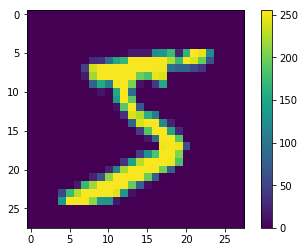

In [11]:
def plot_an_image(d):
    plt.figure()
    plt.imshow(d)
    plt.colorbar()
    plt.gca().grid(False)
plot_an_image(train_images[0])

# Normalize the dataset

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

# Plot 25 images from the dataset

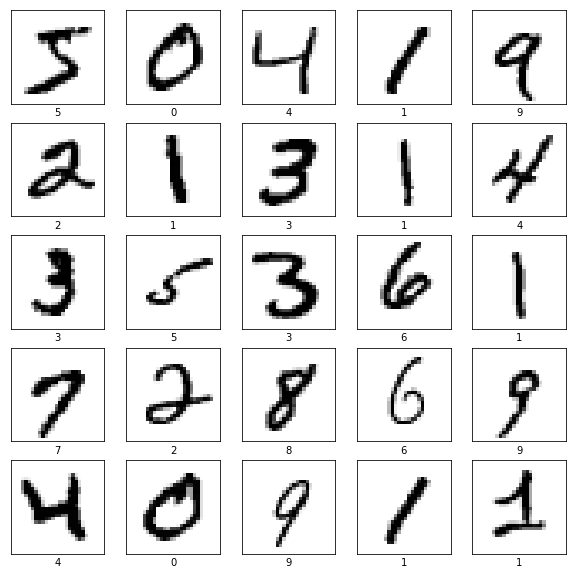

In [13]:
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_labels[train_labels[i]])


# Build the model using keras

In [18]:
# this model creates an input layer of 28x28 units by flattening out the image array,
# hidden layer1 of 512 units followed by a dropout layer,
# hidden layer2 of 512 units followed by a dropout layer,
# and a final layer of 10 units
# the final unit will use one_hot technique to identify the number

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation =tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512,activation =tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

# Compile the model

In [19]:
# here we will be using the Adam Optimizer that is closely related to Schotastic Gradient Descent

model.compile(optimizer = tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the model

In [20]:
history=model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 19s 312us/step - loss: 0.2147 - acc: 0.9348
Epoch 2/5
60000/60000 [==============================] - 21s 347us/step - loss: 0.1061 - acc: 0.9679
Epoch 3/5
60000/60000 [==============================] - 22s 360us/step - loss: 0.0829 - acc: 0.9738
Epoch 4/5
60000/60000 [==============================] - 20s 337us/step - loss: 0.0674 - acc: 0.9791
Epoch 5/5
60000/60000 [==============================] - 36s 597us/step - loss: 0.0574 - acc: 0.98263s - loss: 0.0574 - ETA: 2s - lo - ETA: 1s - loss: 0.0568 - acc:  - ETA: 1s - loss: 


In [21]:
history

In [22]:
print(history)

# Plot the history of loss and accuracy

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

In [26]:
acc = history_dict['acc']
loss = history_dict['loss']

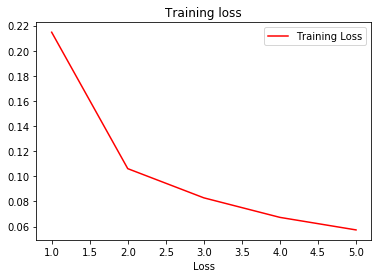

In [31]:
epochs = range(1,len(acc)+1)

#plot the loss curve
plt.plot(epochs,loss,'r',label='Training Loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()

plt.show()

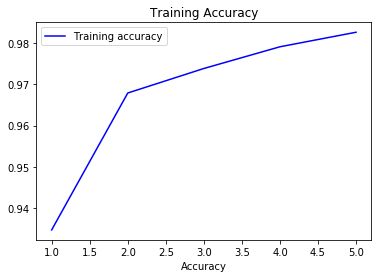

In [33]:
#plot the accuracy curve
plt.plot(epochs,acc,'b',label='Training accuracy')

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()

plt.show()

# Predict on Test set

In [34]:
results = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 96us/step


In [35]:
#print the accuracy on training set
print("Accuracy on training set: ",results[1])

Accuracy on training set:  0.9799


In [52]:
def predict_image(image,label):
    img = np.expand_dims(image,0)
    prediction = model.predict(img)
    print("Model Prediction: ", np.argmax(prediction))
    print("Original Label: ",label)
    
    plot_an_image(image)

Model Prediction:  7
Original Label:  7


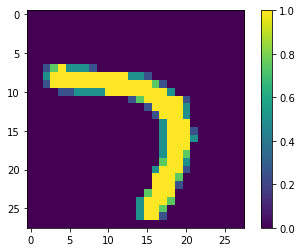

In [55]:
## enter any test case to see the result
predict_image(test_images[60],test_labels[60])